# Lesson 1 Assignment - EnergyLoads

## Author - Trupti Gandhi

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set there some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by n

In [285]:
import numpy as np
import pandas as pd
from statistics import median
import matplotlib.pyplot as plt
from pylab import rcParams
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
sns.set(color_codes= True)
%matplotlib inline

#Get the data
#observed that there are Total 10 features are in the model.

In [286]:
Energy_data = pd.read_csv(r"C:\Users\Gandhi\Desktop\Method_For_Data_Analysys\CH1\EnergyEfficiencyData.csv")
Energy_data.head()

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling Load  
0         21.33  
1         21.33  
2         21.33  
3         21.33  
4         28.28

Examine the data

In [287]:
Energy_data.tail()

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
763                  0.64         784.0      343.0      220.5             3.5   
764                  0.62         808.5      367.5      220.5             3.5   
765                  0.62         808.5      367.5      220.5             3.5   
766                  0.62         808.5      367.5      220.5             3.5   
767                  0.62         808.5      367.5      220.5             3.5   

     Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
763            5           0.4                          5         17.88   
764            2           0.4                          5         16.54   
765            3           0.4                          5         16.44   
766            4           0.4                          5         16.48   
767            5           0.4                          5         16.64   

     Cooling Load  
763         21.40  
764         16.88  
765         17.11  
766         16.61  
767         16.03

In [288]:
Energy_data.describe()

Relative Compactness  Surface Area   Wall Area   Roof Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall Height  Orientation  Glazing Area  Glazing Area Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000                    0.00000   
25%           3.50000     2.750000      0.100000                    1.75000   
50%           5.25000     3.500000      0.250000                    3.00000   
75%           7.00000     4.250000      0.400000                    4.00000   
max           7.00000     5.000000      0.400000                    5.00000   

       Heating Load  Cooling Load  
count    768.000000    768.000000  
mean      22.307201     24.587760  
std       10.090196      9.513306  
min        6.010000     10.900000  
25%       12.992500     15.620000  
50%       18.950000     22.080000  
75%       31.667500     33.132500  
max       43.100000     48.030000

#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution with only 4 and 2 discrete values. I am going to convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

In [289]:
Energy_data.shape

(768, 10)

In [290]:
print ('Print name of the columns ')
print(Energy_data.columns)

Print name of the columns 
Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')


In [291]:
print ('Check Type of the data ') 
print(Energy_data.dtypes)


Check Type of the data 
Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object


Checking missing value

In [292]:
Energy_data = Energy_data.replace('[?]', np.NaN,regex = False)

In [293]:
Energy_data.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [294]:
print(Energy_data.columns)

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')


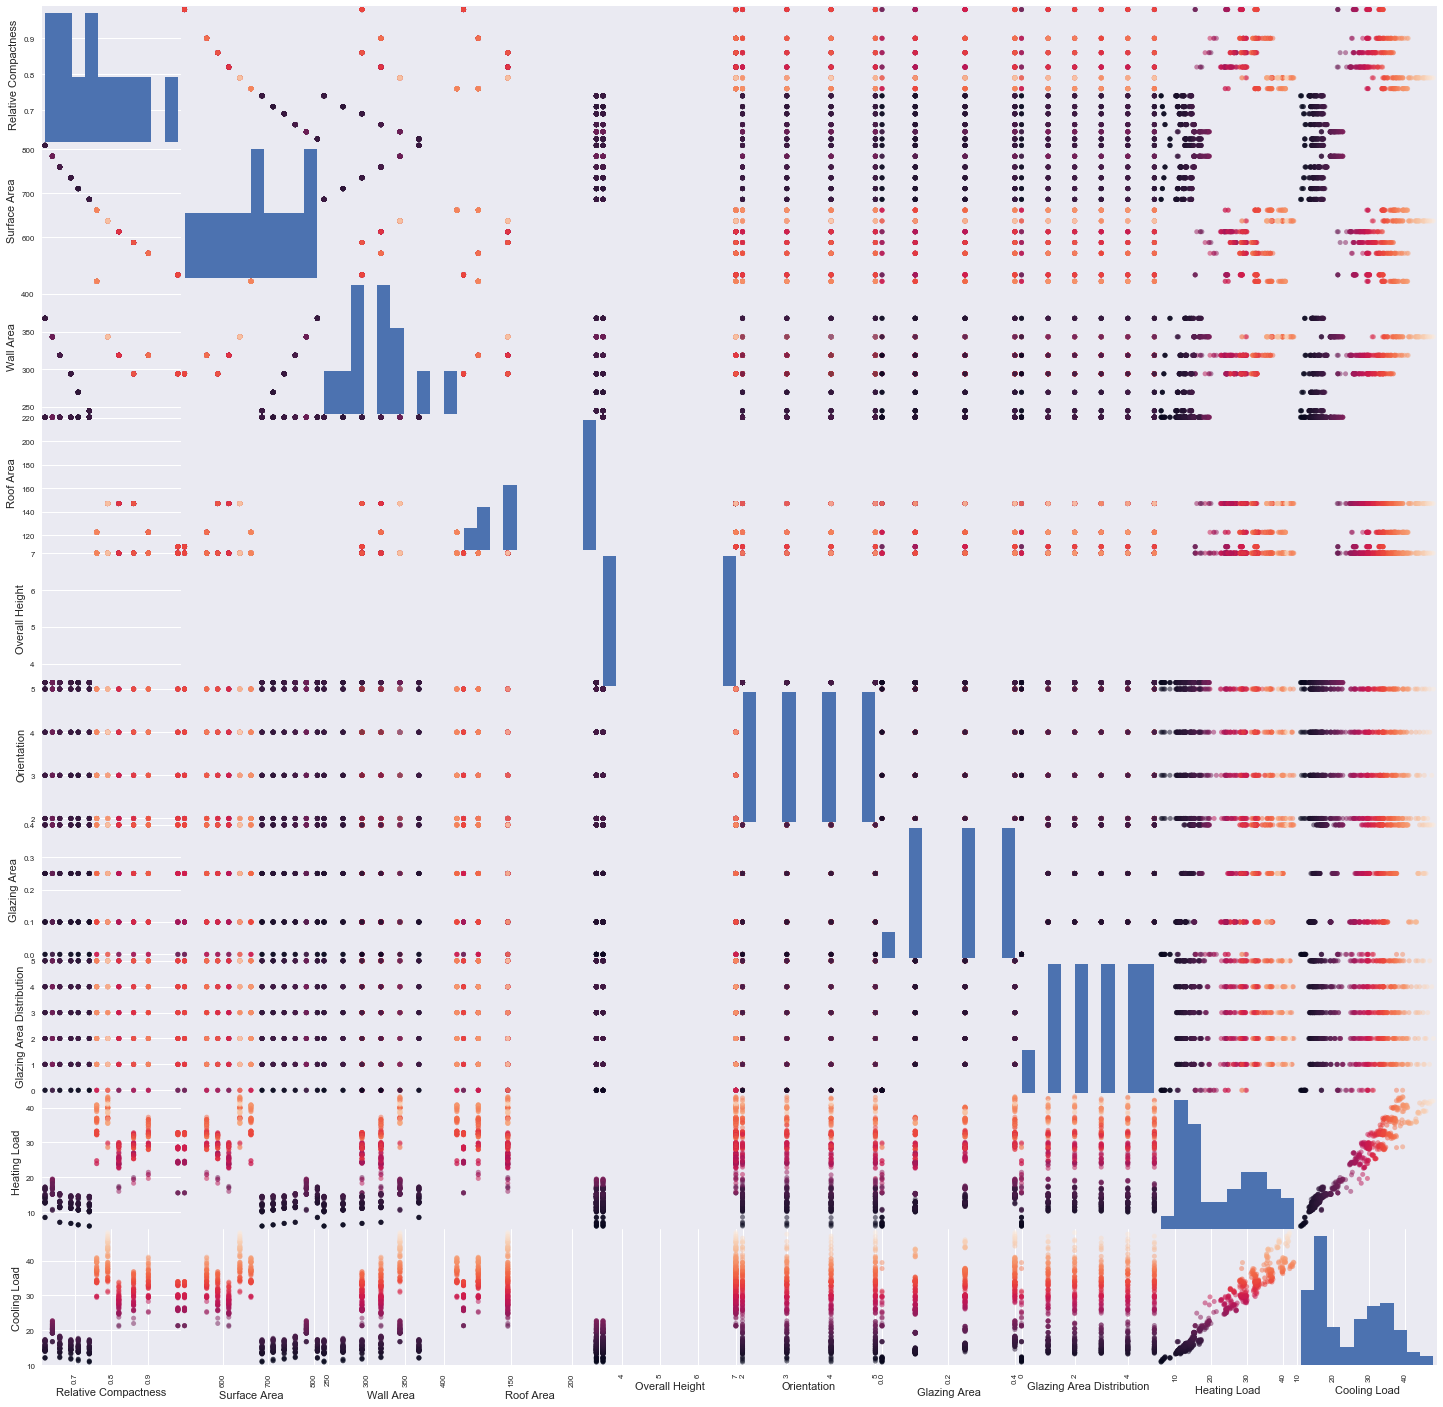

In [295]:
%matplotlib inline
_ = pd.plotting.scatter_matrix(Energy_data,c=Energy_data.loc[:,'Cooling Load'], figsize=[25,25],s =100)

Text(0.5,1,'Checking outliers for the columns')

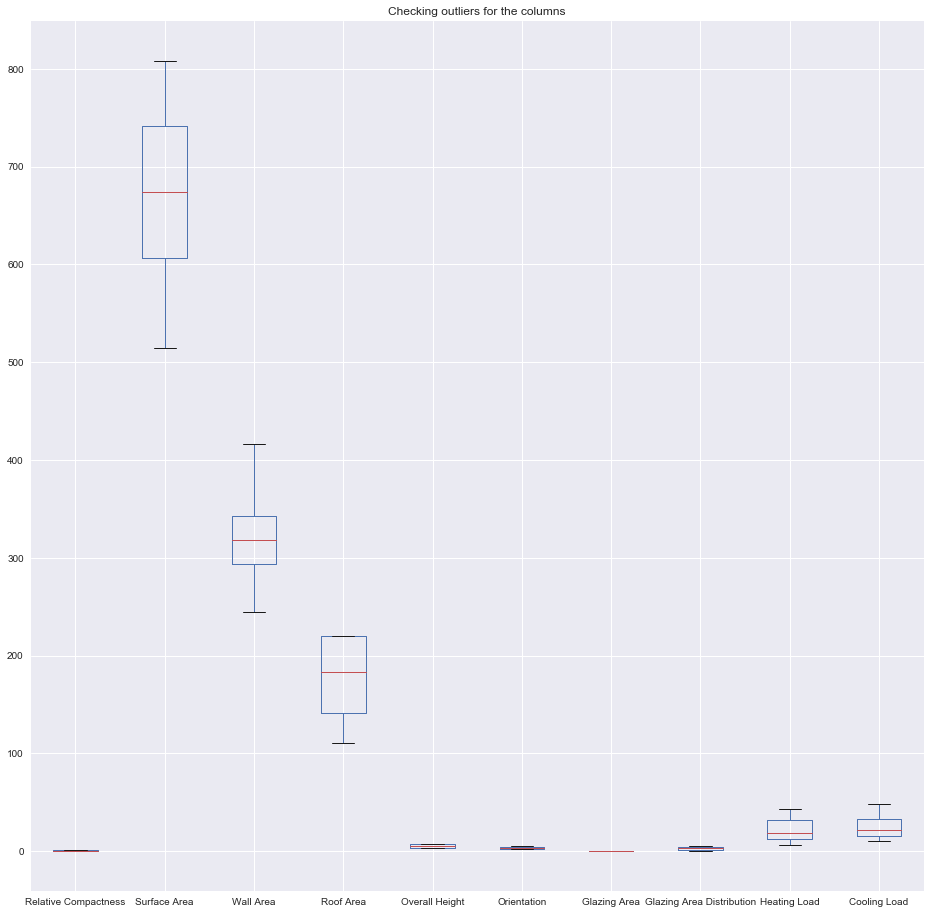

In [296]:
Energy_data.plot(kind='box', figsize=[16,16])
plt.title('Checking outliers for the columns')

If I select all the features from the Model:
1.It is difficult to interpret
2.More likely to over fit
but 
3.Model will have high prediction accuracy.


If I select 1 or 2 features in the model 
1.It is easy to interpret
2.less likely to over fit
but 
3.Model will have low prediction accuracy

Let's try to find 3 key Features for the model.

### My question is How many feature should I select for the model? which to choose?

Let's examine data closely.

Study individual feature --  how many unique numbers, how many elements in each set

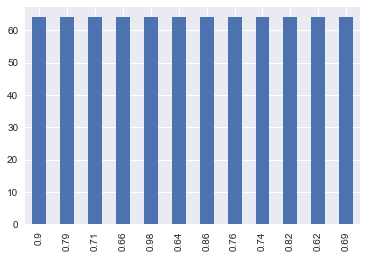

In [297]:
np.sort(Energy_data['Relative Compactness'].unique())
Energy_data['Relative Compactness'].value_counts().plot.bar()

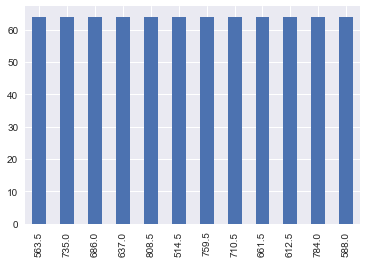

In [298]:
np.sort(Energy_data['Surface Area'].unique())
Energy_data['Surface Area'].value_counts().plot.bar()

Both columns have same number of elements (12), let's try to see if there is any relation between 2 columns

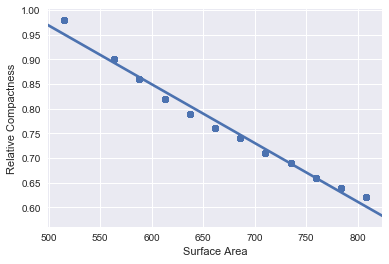

In [299]:
# library & dataset
import seaborn as sns

# use the function regplot to make a scatterplot
sns.regplot(x=Energy_data['Surface Area'], y=Energy_data['Relative Compactness'])

There is negative correlation between these 2 (Surface Area and Relative Compactness) cells, an increase in one variable will cause a decrease in the other. There is a high correlation between these 2 cells.This will provide the same result with Target.
In other words, Corelation with target variable will be the same using these 2 variable. We can take any one feature to evaluate model. 
This is called feature reduction.

### Selecting 1st feature  - Surface Area 

Let's see if there is any relation between Cooling Load and Heating Load variables.

Text(0,0.5,'Density')

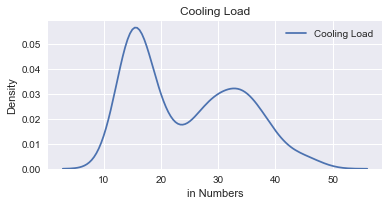

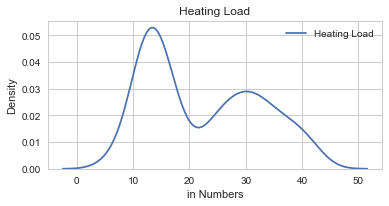

In [300]:
import seaborn as sns
fig = plt.figure(figsize=(6,6)) # define plot area
ax1 = plt.subplot(2,1,1);
sns.set_style("whitegrid")
sns.kdeplot(Energy_data.loc[:, 'Cooling Load'], ax = ax1)
ax1.set_title('Cooling Load') # Give the plot a main title
ax1.set_xlabel('in Numbers') # Set text for the x axis
ax1.set_ylabel('Density')# Set text for y axis

import seaborn as sns
fig = plt.figure(figsize=(6,6)) # define plot area
ax2 = plt.subplot(2,1,2);
sns.set_style("whitegrid")
sns.kdeplot(Energy_data.loc[:, 'Heating Load'], ax = ax2)
ax2.set_title('Heating Load') # Give the plot a main title
ax2.set_xlabel('in Numbers') # Set text for the x axis
ax2.set_ylabel('Density')# Set text for y axis

Text(0.5,1,'Checking relation between Cooling Load with Heating Load')

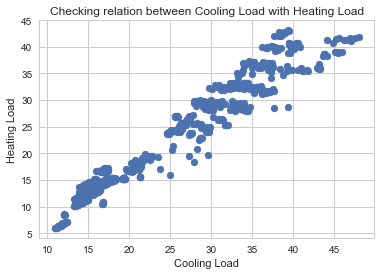

In [301]:
# use the function regplot to make a scatterplot
plt.scatter(x=Energy_data['Cooling Load'], y=Energy_data['Heating Load'])
plt.xlabel('Cooling Load')
plt.ylabel('Heating Load')
plt.title('Checking relation between Cooling Load with Heating Load')

Interpreting Scatterplots:  Both of these variables "Cooling Load" and "Heating Load" are in linear relationships, in which the points are reasonably well fit by a single straight line. in other word, These two variables have a positive association because as "Cooling Load" increases, so does "Heating Load".

Line graph for both the variables is same. It means we can take only one variable as target instead of taking both of them into consideration.

Let's see if we can combine data to find more relation between Glazing Area, Orientation and Cooling Load 

In [302]:
pivoted_cool = pd.pivot_table(Energy_data, values='Cooling Load', columns='Glazing Area', index='Orientation')
print(pivoted_cool)
type(pivoted_cool)

Glazing Area       0.00       0.10       0.25       0.40
Orientation                                             
2             20.280000  22.997667  24.864167  26.816667
3             18.941667  22.746000  24.671667  26.594167
4             18.920833  22.812500  24.838500  26.901833
5             20.682500  23.186000  25.196167  27.333000


pandas.core.frame.DataFrame

Yes!!! as expected there is a relation between these columns. Let's visualize it.

Text(0.5,1,'Checking proporsion of Orientation with Glazing Area')

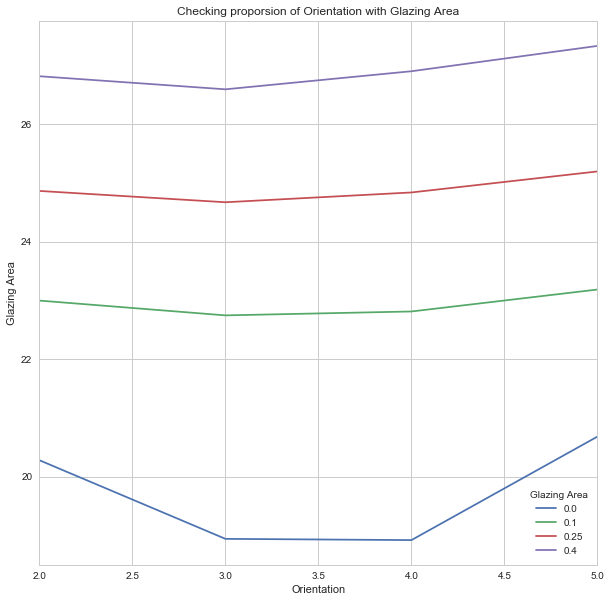

In [303]:
pivoted_cool.plot(figsize=(10,10))
plt.xlabel('Orientation')
plt.ylabel('Glazing Area')
plt.title('Checking proporsion of Orientation with Glazing Area')

Text(0.5,1,'Checking proporsion of Orientation with Glazing Area')

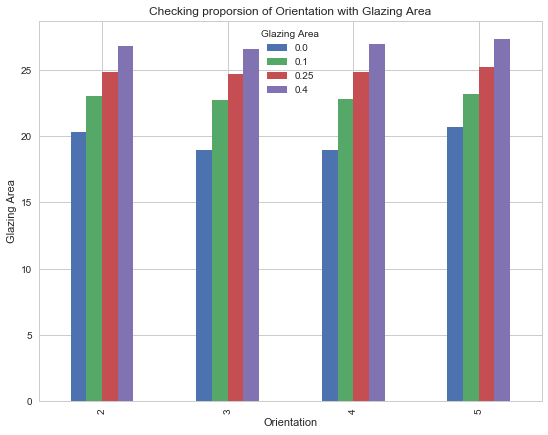

In [304]:
pd.pivot_table(Energy_data, values='Cooling Load', columns='Glazing Area', index='Orientation').plot.bar(figsize = (9,7))
plt.xlabel('Orientation')
plt.ylabel('Glazing Area')
plt.title('Checking proporsion of Orientation with Glazing Area')

Graph shows there is relation between Orientation and Glazing Area. 

let's find if there is any other variable which has relation with orientaion.

Text(0.5,0,'Overall Height')

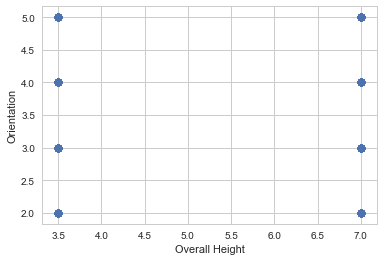

In [305]:
plt.scatter(x=Energy_data['Overall Height'], y=Energy_data['Orientation'])
plt.ylabel('Orientation')
plt.xlabel('Overall Height')

Graph clearly shows there is relation between overall height and Orientation.  

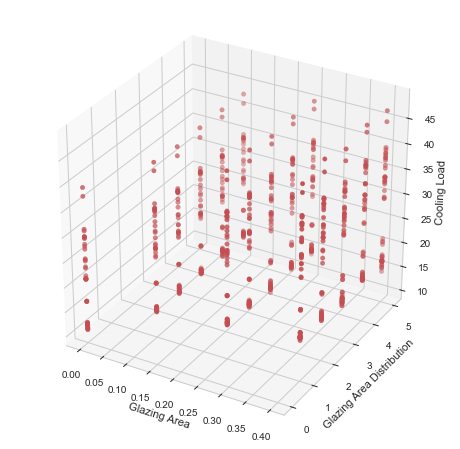

In [306]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

x =(Energy_data['Glazing Area'])
y =(Energy_data['Glazing Area Distribution'])
z =(Energy_data['Cooling Load'])

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Glazing Area')
ax.set_ylabel('Glazing Area Distribution')
ax.set_zlabel('Cooling Load')

plt.show()

Graph shows clear relation between 'Glazing Area Distribution' and 'Glazing Area'. We have already seen there is relation between Orientation and Glazing Area.We have also seen that there is relation between Overall Height and Orientation.There is a high correlation between these 4 features. If we select all the features then our model will less accurate. Let's select one of them. 

### selected 2 nd feature-- Overall Height

Let's use Style to see relation's between other features.

In [307]:
#Highlighting the maximum values in each cell to get more idea about the data
Energy_data.style.highlight_max()

In [308]:
#In mathematics, the gradient is a generalization of the usual concept of derivative of a function in one dimension to a function in several dimensions.
Energy_data.style.background_gradient()

In [309]:
#Bar shows relation between the features
Energy_data.style.bar()

Study Data in details to find one more feature

Text(0.5,1,'Checking proporsion of Overall Height with other columns')

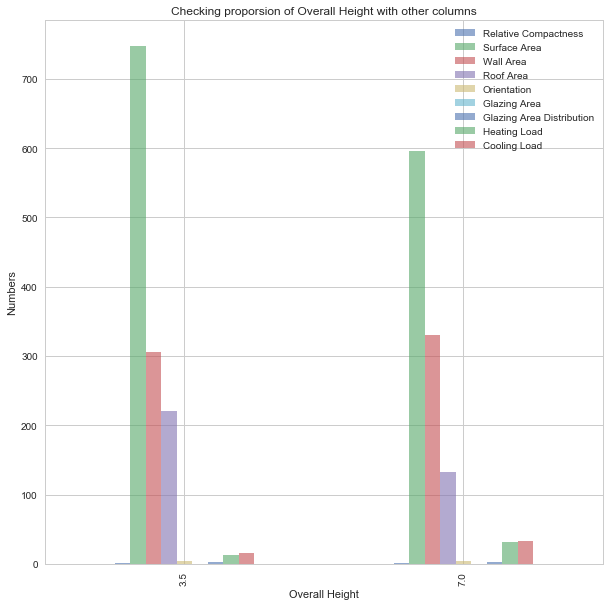

In [310]:
Energy_data.groupby('Overall Height').mean().plot(kind='bar', width=0.5, alpha=0.6, figsize=(10,10))
plt.xlabel('Overall Height')
plt.ylabel('Numbers')
plt.title('Checking proporsion of Overall Height with other columns')

From above graph, we can see there is interesting relationship between overall height and wall area. Let's find out if Wall Area is important feature or not. 

Text(0.5,1,'Checking relation between Overall Height with Wall Area')

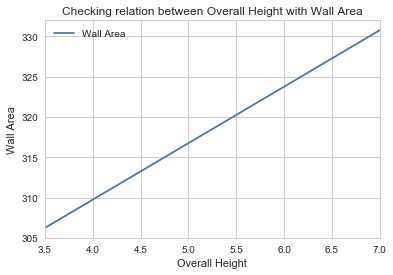

In [311]:
pivoted = pd.pivot_table(Energy_data, values='Wall Area',  index='Overall Height')
pivoted.plot()
plt.xlabel('Overall Height')
plt.ylabel('Wall Area')
plt.title('Checking relation between Overall Height with Wall Area')

Text(0.5,1,'Checking relation between Overall Height with roof Area')

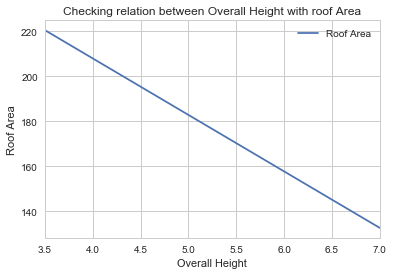

In [312]:
pivoted = pd.pivot_table(Energy_data, values='Roof Area',  index='Overall Height')
pivoted.plot()
plt.xlabel('Overall Height')
plt.ylabel('Roof Area')
plt.title('Checking relation between Overall Height with roof Area')

Four things reported to describe a relationship between Wall Area and Roof Area: 1) The strength of the relationship is good with overall Height. 2) The direction of the relationship for wall Area is positive but for Roof Area is negative in this case.  3) The shape of the relationship is linear in wall area vs overall height and inverse for Roof Area and overall Height. 4)This relationship is statistically significant as both of them showing strong relation with overall height.

In [313]:
from scipy.interpolate import *
x=Energy_data['Cooling Load']
y=Energy_data['Wall Area']
p1 = np.polyfit(x,y,1)
print(p1)

[   1.95868951  270.3402117 ]


Text(0.5,1,'Checking relation between Cooling Load with Wall Area')

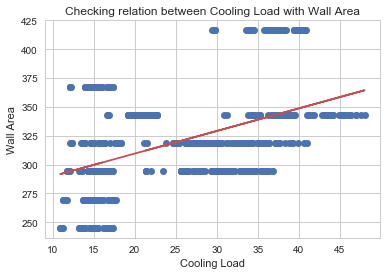

In [314]:
plt.plot(x,y, 'o')
plt.plot(x,np.polyval(p1,x), '-r')
plt.xlabel('Cooling Load')
plt.ylabel('Wall Area')
plt.title('Checking relation between Cooling Load with Wall Area')

There is positive correlation between these 2, Cooling Load and Wall Area features, an increase in one variable will cause a increase in the other. 

[   1.9701629   274.55118117]


Text(0.5,1,'Checking relation between Heating Load with Wall Area')

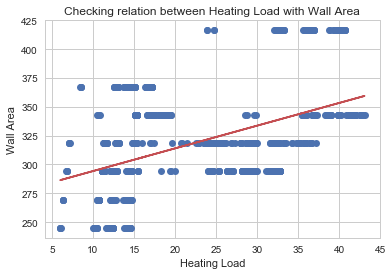

In [315]:
from scipy.interpolate import *
x=Energy_data['Heating Load']
y=Energy_data['Wall Area']
p1 = np.polyfit(x,y,1)
print(p1)
plt.plot(x,y, 'o')
plt.plot(x,np.polyval(p1,x), '-r')
plt.xlabel('Heating Load')
plt.ylabel('Wall Area')
plt.title('Checking relation between Heating Load with Wall Area')

Heating Data shows same result as cooling data.

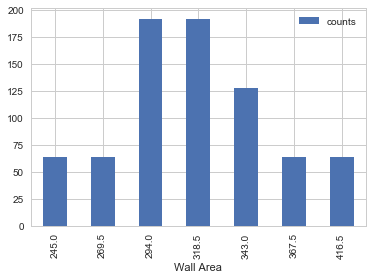

In [316]:
#Another way to do this
Energy_data['counts'] = 1
Energy_data.loc[:, ['Wall Area', 'counts']].groupby(['Wall Area']).agg('count').plot.bar()

Let's investigate Roof Area feature

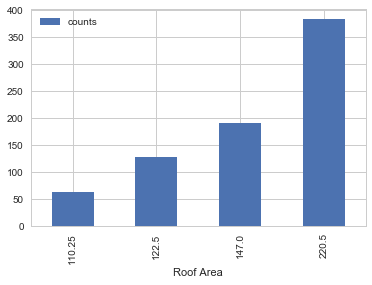

In [317]:
#Another way to do this
Energy_data['counts'] = 1
Energy_data.loc[:, ['Roof Area', 'counts']].groupby(['Roof Area']).agg('count').plot.bar()

[  -3.85773408  262.65941439]


Text(0.5,1,'Checking relation between Heating Load with Roof Area')

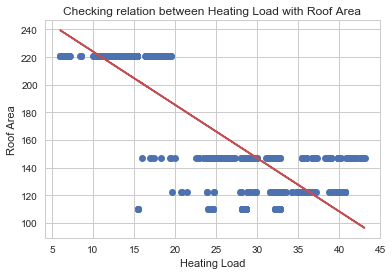

In [318]:
from scipy.interpolate import *
x=Energy_data['Heating Load']
y=Energy_data['Roof Area']
p1 = np.polyfit(x,y,1)
print(p1)
plt.plot(x,y, 'o')
plt.plot(x,np.polyval(p1,x), '-r')
plt.xlabel('Heating Load')
plt.ylabel('Roof Area')
plt.title('Checking relation between Heating Load with Roof Area')

Correlation can help in predicting one quantity from another. Roof Area and Wall Area has reverse relation when they are connected with Overall Height.As Roof Area increases, Heating load /Cooling load decreases.(Negative relation). Roof Area is divided into 4 subset and it has interesting relation with the target variable.

### Selected 3 rd feature - Roof Area 

use Pearson Correlation method to find most valuable features and cross validate the selection of the features. 

In [319]:
corr = Energy_data.corr()
print(corr)

                           Relative Compactness  Surface Area     Wall Area  \
Relative Compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
Surface Area                      -9.919015e-01  1.000000e+00  1.955016e-01   
Wall Area                         -2.037817e-01  1.955016e-01  1.000000e+00   
Roof Area                         -8.688234e-01  8.807195e-01 -2.923165e-01   
Overall Height                     8.277473e-01 -8.581477e-01  2.809757e-01   
Orientation                        0.000000e+00  0.000000e+00  0.000000e+00   
Glazing Area                       1.283986e-17  1.318356e-16 -7.969726e-19   
Glazing Area Distribution          1.764620e-17 -3.558613e-16  0.000000e+00   
Heating Load                       6.222722e-01 -6.581202e-01  4.556712e-01   
Cooling Load                       6.343391e-01 -6.729989e-01  4.271170e-01   
counts                                      NaN           NaN           NaN   

                              Roof Area  Overall He

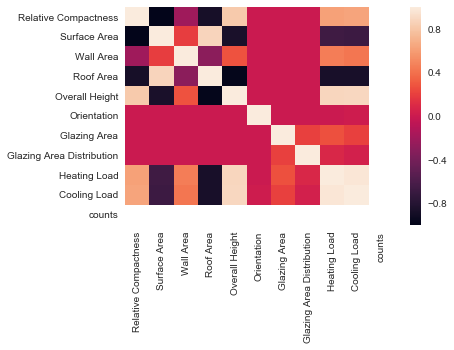

In [320]:
sns.heatmap(corr,xticklabels = corr.columns.values, yticklabels = corr.columns.values)

Correlation can be an important tool for feature engineering in building machine learning models. Predictors which are uncorrelated with the objective variable are probably good candidates to trim from the mode. In addition, if two predictors are strongly correlated to each other, then we only need to use one of them (in predicting salary, there is no need to use both Surface Area and Relative Compactness). Taking these steps means that the resulting model will be simpler, and simpler models are easier to interpret.

3 key features from the data are:
Surface Area,
Roof Area,
Overall Height

